In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from sklearn.metrics import classification_report

#Load IMDb dataset
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.imdb.load_data(num_words=10000)

#Padding sequences to make sure all reviews have the same length
x_train = pad_sequences (x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

#Encode labels (positive/negative)
y_train = np.array(y_train)
y_test = np.array(y_test)



def train_model(model_type='RNN'):
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=64, input_length=200))

    if model_type == 'RNN':
        model.add(SimpleRNN(64, return_sequences=False))
    elif model_type == 'LSTM':
        model.add(LSTM(64, return_sequences=False))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    print(f"\nTraining {model_type} Model")

    history = model.fit(x_train, y_train, epochs=5, batch_size=500, validation_data=(x_test, y_test))

    return model, history


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Training RNN Model
Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.5457 - loss: 0.6832 - val_accuracy: 0.6992 - val_loss: 0.5900
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7915 - loss: 0.4603 - val_accuracy: 0.8409 - val_loss: 0.3732
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8947 - loss: 0.2704 - val_accuracy: 0.8444 - val_loss: 0.3698
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9502 - loss: 0.1536 - val_accuracy: 0.8411 - val_loss: 0.4001
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9765 - loss: 0.0829 - val_accuracy: 0.8390 - val_loss: 0.4508

Training LSTM Model
Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.6358 - loss: 0.6465 - val_accuracy: 0.8260 - val_loss: 0.3874
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8616 - loss: 0.3321 - val_accuracy: 0.8719 - val_loss: 0.3032
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9184 - loss: 

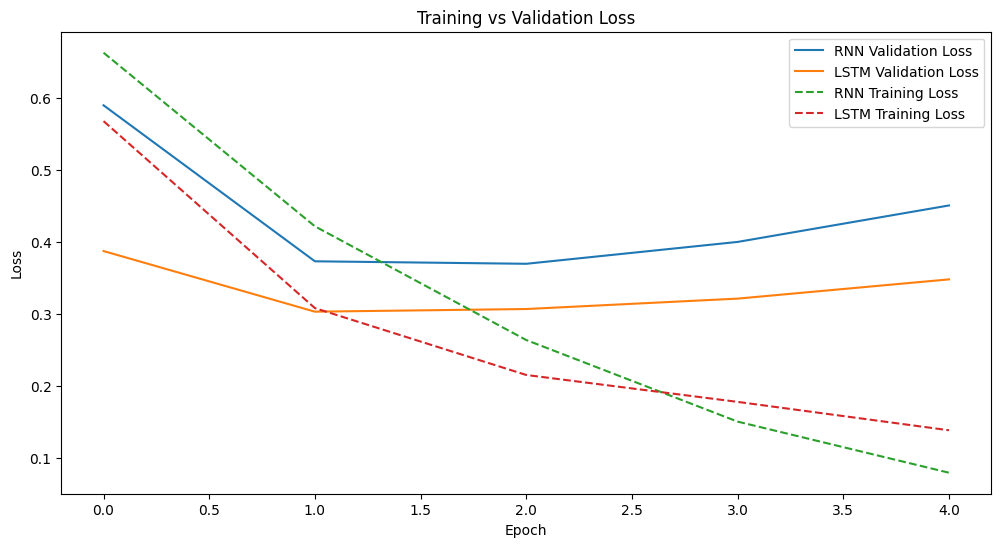


Evaluasi RNN:
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step
              precision    recall  f1-score   support

     Negatif       0.82      0.87      0.84     12500
     Positif       0.86      0.81      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000


Evaluasi LSTM:
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
              precision    recall  f1-score   support

     Negatif       0.85      0.89      0.87     12500
     Positif       0.89      0.84      0.86     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [ ]:
#Train RNN.
rnn_model, rnn_history = train_model('RNN')

#Train LSTM
lstm_model, lstm_history = train_model('LSTM')

#Visualize Training vs Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(rnn_history.history['loss'], '--', label='RNN Training Loss')
plt.plot(lstm_history.history['loss'], '--', label='LSTM Training Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Evaluasi RNN
print("\nEvaluasi RNN:")
rnn_predictions = (rnn_model.predict(x_test) > 0.5).astype(int)
print(classification_report(y_test, rnn_predictions, target_names=["Negatif", "Positif"]))


# Evaluasi LSTM
print("\nEvaluasi LSTM:")
lstm_predictions = (lstm_model.predict(x_test) > 0.5).astype(int)

print(classification_report(y_test, lstm_predictions, target_names=["Negatif", "Positif"]))

# Menampilkan prediksi menggunakan model RNN dan LSTM
def show_predictions(model, x_test, y_test, model_name):
    print(f"\nHasil Prediksi ({model_name}):\n")

    for i in range(5):  # Menampilkan 5 contoh prediksi
        review = " ".join([str(word) for word in x_test[i]])  # Mengubah ID menjadi kata
        prediction = (model.predict(x_test[i:i+1]) > 0.5).astype(int)  # Prediksi untuk 1 review
        sentiment = 'Positif' if prediction == 1 else 'Negatif'
        actual_sentiment = 'Positif' if y_test[i] == 1 else 'Negatif'

        print(f"Review: {review}\nPrediksi Sentimen: {sentiment}\nSentimen Sebenarnya: {actual_sentiment}\n")


In [ ]:
# Prediksi menggunakan model RNN
show_predictions (rnn_model, x_test, y_test, "RNN")

# Prediksi menggunakan model LSTM
show_predictions (lstm_model, x_test, y_test, "LSTM")


Hasil Prediksi (RNN):

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
Review: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 591 202 14 31 6 717 10 10 2 2 5 4 360 7 4 177 5760 394 354 4 123 9 1035 1035 1035 10 10 13 92 124 89 488 7944 100 28 1668 14 31 23 27 7479 29 220 468 8 124 14 286 170 8 157 46 5 27 239 16 179 2 38 32 25 7944 451 202 14 6 717
Prediksi Sentimen: Negatif
Sentimen Sebenarnya: Negatif

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Review: 1987 2 45 55 221 15 670 5304 526 14 1069 4 405 5 2438 7 27 85 108 131 4 5045 5304 3884 405 9 3523 133 5 50 13 104 51 66 166 14 22 157 9 4 530 239 34 8463 2801 45 407 31 7 41 3778 105 21 59 299 12 38 950 5 4521 15 45 629 488 2733 127 6 52 292 17 4 6936 185 132 1988 5304 1799 488 2693 47 6 392 173 4 2 4378 270 2352 4 1500 7 4 65 55 73 